In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df_absent = pd.read_excel("Absenteeism_at_work.xls")
df_absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
df_absent.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [4]:
df_absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [5]:
df_absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

# EDA

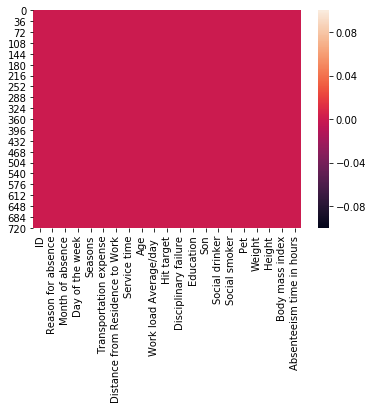

In [6]:
sns.heatmap(df_absent.isnull())

In [7]:
df_absent.skew()

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

In [8]:
df_absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
from scipy.stats import zscore
z_score=abs(zscore(df_absent))
print(df_absent.shape)
df_absent_final=df_absent.loc[(z_score<3).all(axis=1)]
print(df_absent_final.shape)

(740, 21)
(576, 21)


In [10]:
df_absent_final.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              1.019484
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.990046
Son                                1.447470
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.721238
Weight                            -0.128296
Height                             1.449688
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

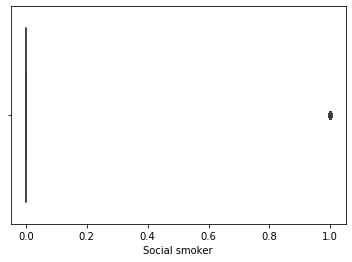

In [11]:
sns.boxplot(x=df_absent['Social smoker'])

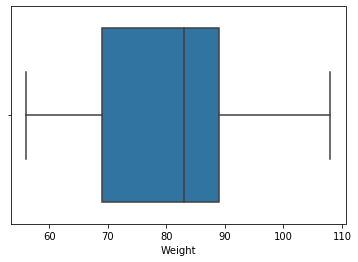

In [12]:
sns.boxplot(x=df_absent['Weight'])

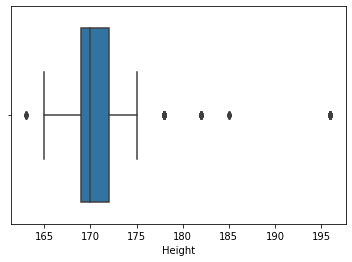

In [13]:
sns.boxplot(x=df_absent['Height'])

In [14]:
x=df_absent.drop(columns=["Absenteeism time in hours"])
y=pd.DataFrame(df_absent["Absenteeism time in hours"])

In [15]:
x

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30
736,1,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29
737,4,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34
738,8,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35


In [16]:
y

,Absenteeism time in hours
0,4
1,0
2,2
3,4
4,2
...,...
735,8
736,4
737,0
738,0


# Modelling

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
print(x_train.shape,x_test.shape)

(555, 20) (185, 20)


In [19]:
print(y_train.shape,y_test.shape)

(555, 1) (185, 1)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [21]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RF=RandomForestClassifier()

In [22]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RF))

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

**************************** KNeighborsClassifier ********************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy score =  0.31891891891891894


Cross_val_Score =  0.13981217706558394


classification_report
               precision    recall  f1-score   support

           0       0.29      0.33      0.31        12
           1       0.19      0.21      0.20        24
           2       0.33      0.33      0.33        40
           3       0.25      0.32      0.28        25
           4       0.21      0.19      0.20        16
           5       0.00      0.00      0.00         2
           8       0.45      0.49      0.47        53
          16       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         5
          32       0.00      0.00      0.00         1
          40       0.00    

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-ve

AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** SVC ********************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy score =  0.3837837837837838




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWar

Cross_val_Score =  0.32882952472775095


classification_report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.45      0.21      0.29        24
           2       0.47      0.17      0.25        40
           3       0.50      0.32      0.39        25
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         2
           8       0.37      0.96      0.53        53
          16       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         5
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          80       0.00      0.00      0.00         2

    accuracy                           0.38       185
   macro avg       0.15      0.14      0.12       185
weighted avg       0.33      0.38      0.30       185



[[ 0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  5  1  1  0  0 17  0  0

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=

Cross_val_Score =  0.3672827074747905


classification_report
               precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.00      0.00      0.00        24
           2       0.27      0.42      0.33        40
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         2
           8       0.34      0.77      0.48        53
          16       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         5
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          80       0.00      0.00      0.00         2
         120       0.00      0.00      0.00         0

    accuracy                           0.32       185
   macro avg       0.12      0.10      0.07       185
weighted avg       0.22      0.32      0.22       185



[[ 1  0  2  0 

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in an

Cross_val_Score =  0.32080602505521394


classification_report
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.12      0.08      0.10        24
           2       0.40      0.45      0.42        40
           3       0.20      0.24      0.22        25
           4       0.36      0.31      0.33        16
           5       0.00      0.00      0.00         2
           8       0.53      0.45      0.49        53
          16       0.00      0.00      0.00         3
          24       0.25      0.40      0.31         5
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         0
          80       0.00      0.00      0.00         2
         120       0.00      0.00      0.00         0

    accuracy                           0.36       185
   macro avg       0.19      0.19      0.19       185
weighted avg    

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Cross_val_Score =  0.39475797657952105


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.28      0.38      0.32        24
           2       0.38      0.33      0.35        40
           3       0.52      0.44      0.48        25
           4       0.18      0.12      0.15        16
           5       0.00      0.00      0.00         2
           8       0.54      0.66      0.59        53
          16       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         5
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         0
          80       0.00      0.00      0.00         2

    accuracy                           0.44       185
   macro avg       0.22      0.23      0.22       185
weighted avg       0.42      0.44      0.43       185



[[12  0  0  0

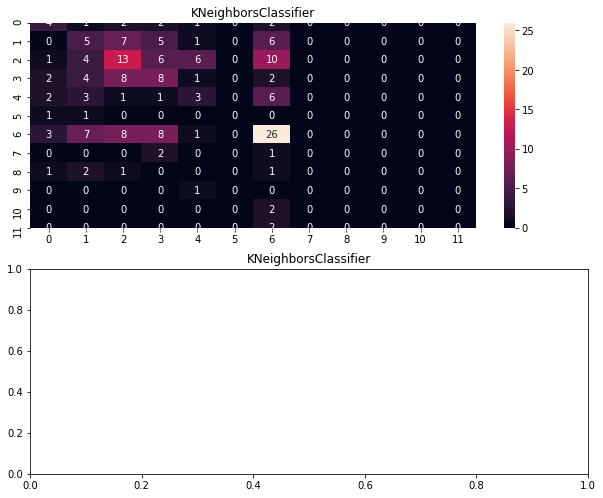

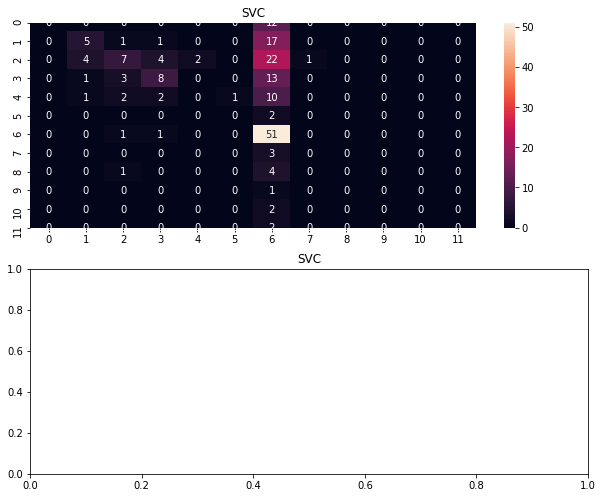

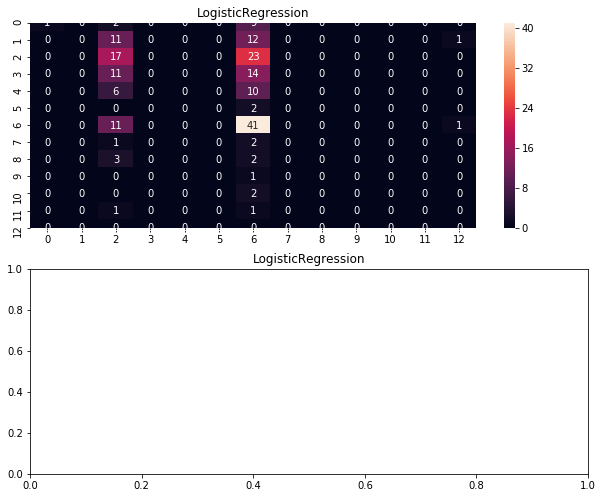

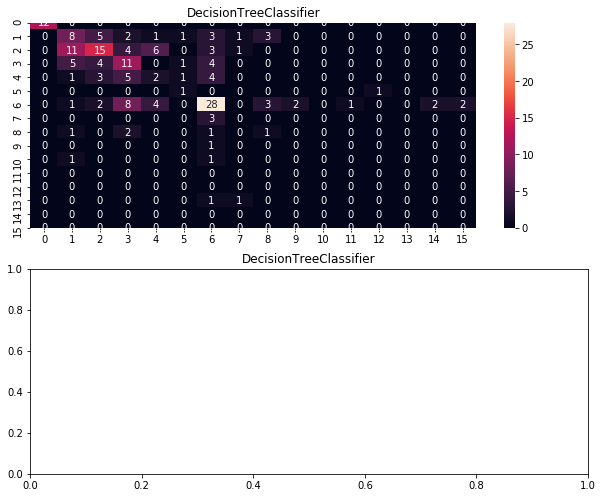

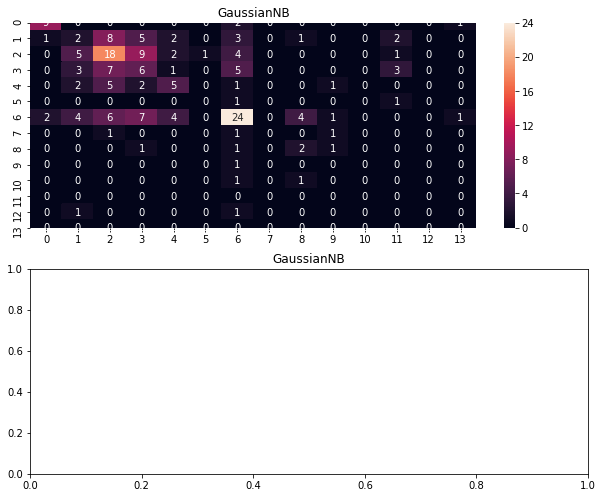

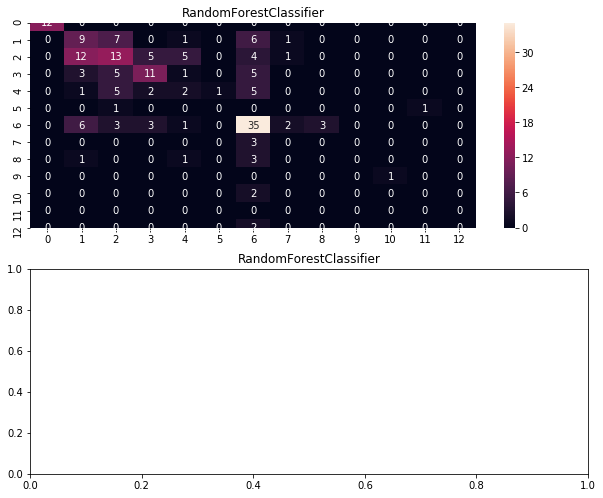

In [24]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****************************',name,'********************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    print('\n\n')

In [25]:
result=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,31.891892,13.981218
1,SVC,38.378378,32.882952
2,LogisticRegression,31.891892,36.728271
3,DecisionTreeClassifier,42.162162,33.908103
4,GaussianNB,35.675676,32.080603
5,RandomForestClassifier,44.324324,39.475798


# Model Selection

In [ ]:
I choose RandomForestClassifier Model as my preferred model as it performs better on the above dataset.

# Save the Model

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(RF,'Model_Absenteeism.csv')